<a href="https://colab.research.google.com/github/medranfederico-commits/entrega1/blob/main/ProyectoDS_Parte2_MedranF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final - Visualizaciones en Python
Primera entrega
Archivo: ProyectoDS_Parte1_MedranF.ipynb
---
#Abstract
El trabajo se centra en el análisis del dataset Used_Car_Price_Prediction, obtenido de la plataforma Kaggle. El mismo reúne información comercial y técnica sobre vehículos usados listados para su venta en línea. El objetivo de este proyecto es elaborar un notebook que incorpore un resumen formal, preguntas e hipótesis de investigación, identificación de valores faltantes, resúmenes numéricos y visualizaciones que permitan interpretar relaciones univariadas, bivariadas y multivariadas entre variables relevantes para la determinación del precio de venta.

El dataset contiene 7.400 observaciones y 29 variables, incluyendo características como el año de fabricación, el tipo de combustible, la cantidad de kilómetros recorridos, el precio de venta, la ciudad de publicación del anuncio, el número de vistas acumuladas, la carrocería, la transmisión, el número de propietarios previos, además de atributos comerciales adicionales como la disponibilidad de garantía, el precio original y la financiación. Este amplio conjunto de variables posibilita la exploración de diferentes hipótesis relacionadas con la depreciación de los automóviles en función de la antigüedad y el kilometraje, los efectos del combustible y la transmisión sobre el valor de reventa, y la influencia de indicadores de interés del mercado —como el número de visualizaciones— en la fijación del precio.

En esta primera etapa se propone: formular preguntas de investigación claras y contrastables; evaluar la calidad del dataset mediante la identificación de valores faltantes, inconsistencias y la revisión de distribuciones; generar visualizaciones que combinen múltiples variables para detectar patrones de interés; y vincular los hallazgos descriptivos con las hipótesis planteadas. El análisis realizado hace hincapié en interpretaciones cuantitativas y visuales que servirán como base para una posterior fase de modelado predictivo orientado a la estimación de precios de venta de vehículos usados. Finalmente, se dejan asentadas las principales limitaciones iniciales observadas en los datos, así como los pasos sugeridos para su depuración y enriquecimiento en etapas posteriores.

## Preguntas de interés

1. **Pregunta 1:** ¿Cómo afectan el kilometraje y la antigüedad al precio de venta?  
   

2. **Pregunta 2:** ¿Influye el tipo de combustible y la transmisión en el valor de reventa?  
   

3. **Pregunta 3:** ¿Existe relación entre la interacción anuncio–entusiasmo  y el precio final?  
   


In [30]:
# Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Importacion de base de datos
path_base = "https://raw.githubusercontent.com/medranfederico-commits/entrega1/refs/heads/main/Used_Car_Price_Prediction.csv"
df = pd.read_csv(path_base)
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [32]:
# valores faltantes por columna
missing = df.isna().sum().sort_values(ascending=False)
# Mostrar solo las columnas que tienen al menos un valor faltante
missing[missing > 0]

,0
original_price,3280
car_availability,620
transmission,556
source,126
body_type,103
registered_state,10
registered_city,10
car_rating,9
fitness_certificate,8
ad_created_on,1


In [33]:
# Estadísticos descriptivos de variables numéricas relevantes
vars_num = ['yr_mfr','kms_run','sale_price','times_viewed','total_owners','car_rating']
df[vars_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr_mfr,7400.0,2013.885676,3.087613,1996.0,2012.00,2014.0,2016.0,2021.0
kms_run,7400.0,62624.520000,43532.042371,60.0,31885.25,55765.0,84184.0,996609.0
sale_price,7400.0,454889.192027,282702.329741,0.0,281174.00,382449.0,540149.0,3866000.0
times_viewed,7400.0,1550.706081,2080.952842,3.0,554.75,1088.0,1926.5,61930.0
total_owners,7400.0,1.327297,0.579798,1.0,1.00,1.0,2.0,6.0


#Analisis univariado
Histogramas de precio de venta, kilometros recorridos y año de fabricación

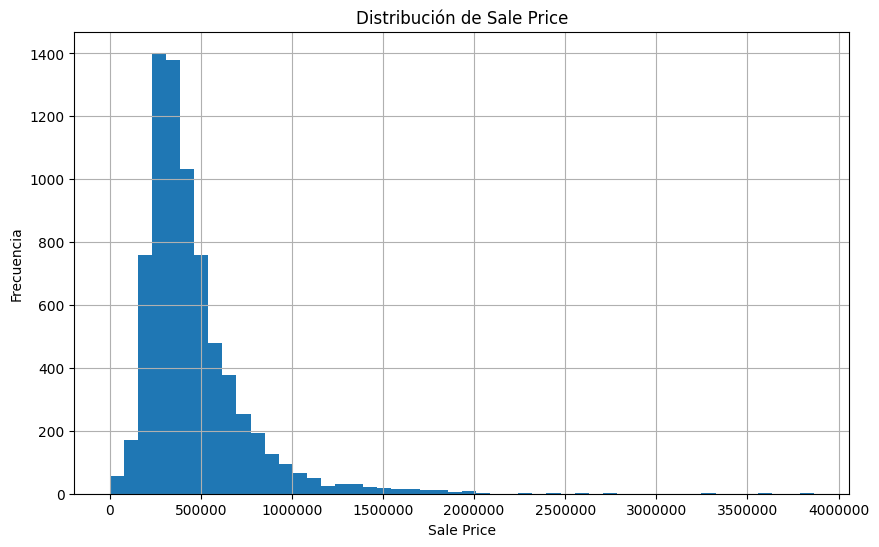

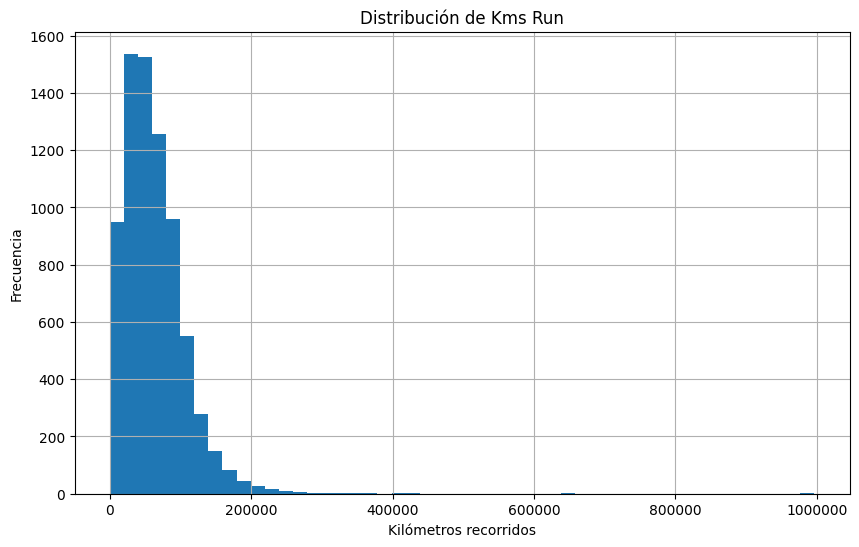

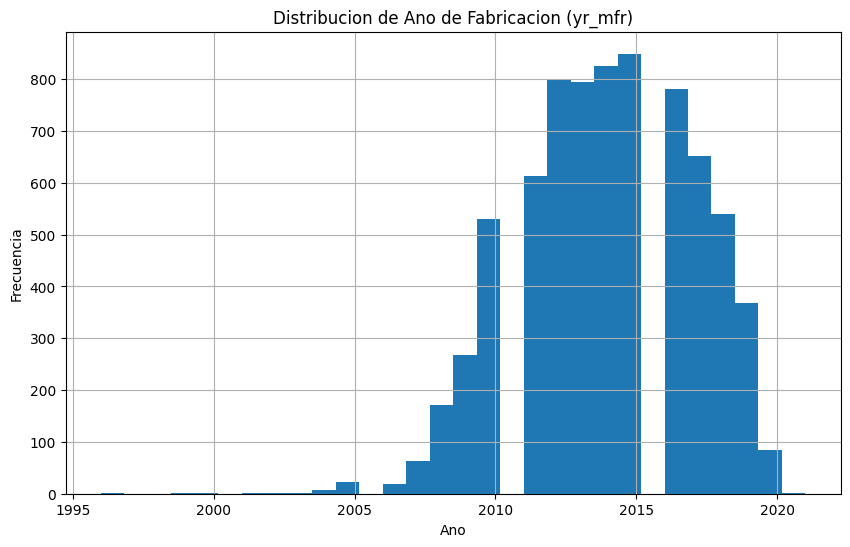

In [34]:
# Histograma de precio de venta (sale_price)
plt.figure(figsize=(10, 6)) # Increased figure size
ax1 = df['sale_price'].hist(bins=50)
plt.title('Distribución de Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frecuencia')
# Format x-axis labels
ax1.ticklabel_format(style='plain', axis='x', useOffset=False, useMathText=False)
plt.show()

# Histograma kms_run
plt.figure(figsize=(10, 6)) # Increased figure size
ax2 = df['kms_run'].hist(bins=50)
plt.title('Distribución de Kms Run')
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Frecuencia')
# Format x-axis labels
ax2.ticklabel_format(style='plain', axis='x', useOffset=False, useMathText=False)
plt.show()

# Histograma año de fabricación
plt.figure(figsize=(10, 6)) # Increased figure size
df['yr_mfr'].hist(bins=30)
plt.title('Distribucion de Ano de Fabricacion (yr_mfr)') # Corrected title
plt.xlabel('Ano') # Corrected xlabel
plt.ylabel('Frecuencia')
plt.show()

#Analisis bivariado
Relacion entre el precio de venta y los kilometros recorridos

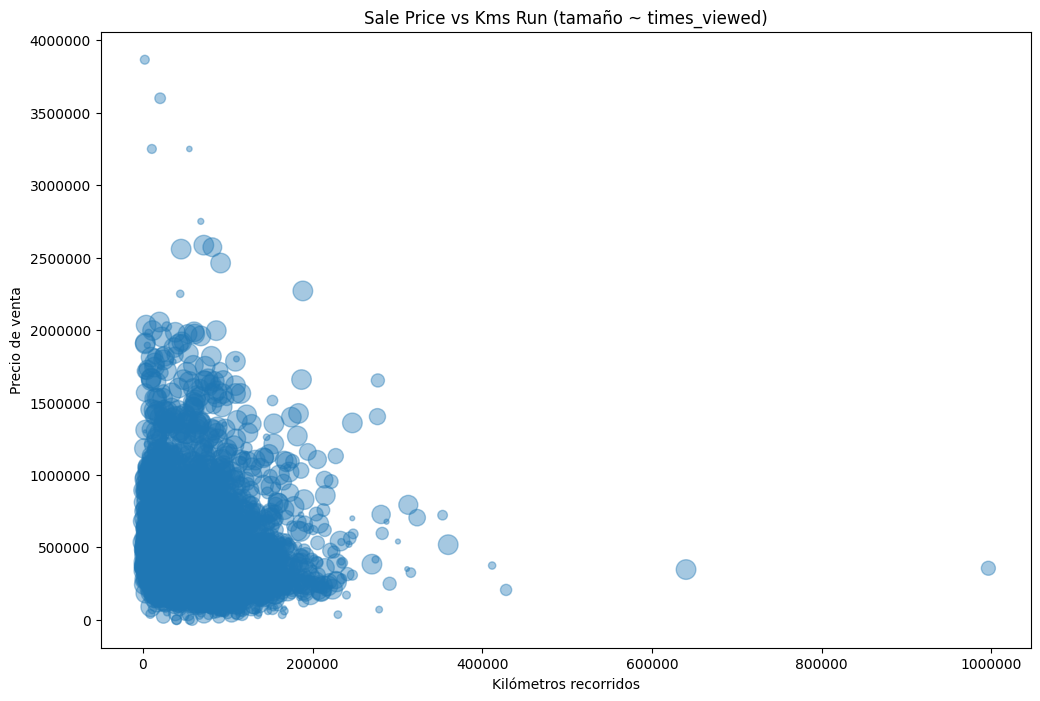

In [35]:
# Scatter sale_price vs kms_run, tamaño por times_viewed
import numpy as np
plt.figure(figsize=(12, 8)) # Increased figure size
plt.scatter(df['kms_run'], df['sale_price'], s=np.clip(df['times_viewed']/10, 5, 200), alpha=0.4)
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio de venta')
plt.title('Sale Price vs Kms Run (tamaño ~ times_viewed)')
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useMathText=False)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useMathText=False)
plt.show()

#Analisis Multivariado
Relacion entre precio de venta, kilometraje, tipo de transmision y tamaño segun vistas

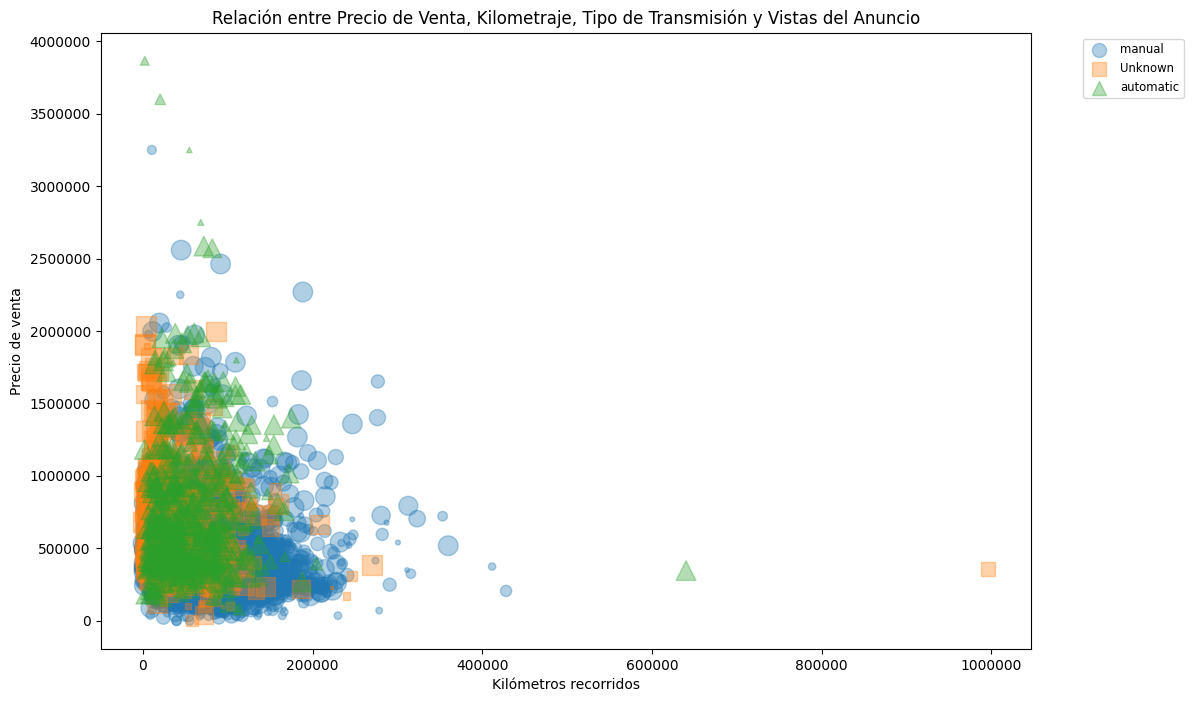

In [36]:
# Prepare categorical variables for marking
df_plot = df.copy()
df_plot['transmission'] = df_plot['transmission'].fillna('Unknown')

markers = ['o', 's', '^', 'D', 'v', 'P', 'X']
trans_vals = df_plot['transmission'].unique()
marker_map = {k: markers[i % len(markers)] for i,k in enumerate(trans_vals)}

plt.figure(figsize=(12, 8)) # Increased figure size
for t in trans_vals:
    sub = df_plot[df_plot['transmission']==t]
    plt.scatter(sub['kms_run'], sub['sale_price'], s=np.clip(sub['times_viewed']/10,5,200), marker=marker_map[t], alpha=0.35, label=str(t))
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio de venta')
plt.title('Relación entre Precio de Venta, Kilometraje, Tipo de Transmisión y Vistas del Anuncio') # Updated title
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useMathText=False) # Formatted x-axis
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useMathText=False) # Formatted y-axis
plt.show()

## Interpretaciones y diagnóstico inicial

- **Valores faltantes:** Se identificaron columnas con valores nulos (por ejemplo `transmission` y `body_type`). Es necesario decidir reglas de imputación o exclusión en etapas posteriores de modelado.  
- **Relaciones univariadas:** La distribución de `sale_price` muestra asimetría positiva (colas a la derecha), indicando la presencia de valores de mayor precio que no representan la mediana del mercado. `kms_run` presenta una distribución concentrada en rangos bajos a moderados con algunos outliers de alto kilometraje.  
- **Relaciones bivariadas:** Existe una tendencia negativa clara entre `sale_price` y `kms_run`: a mayor kilometraje, menor precio, aunque con dispersión considerable; vehículos con alto `times_viewed` aparecen tanto en rangos altos como bajos de precio, lo que sugiere que `times_viewed` es un proxy de interés pero no suficiente para explicar el precio por sí solo.  
- **Análisis multivariado:** Al segmentar por `transmission`, se observan diferencias en la dispersión de precios entre tipos de transmisión. La inclusión de `times_viewed` como tamaño de punto ayuda a visualizar anuncios con mayor visibilidad y su distribución de precios relativa.  

#Deteccion de outliers con el método IQR


In [37]:
# Detección de outliers con el método IQR
def detectar_outliers_iqr(data, columnas):
    outliers = {}
    for col in columnas:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < limite_inferior) | (data[col] > limite_superior)][col]
        print(f"\nVariable: {col}")
        print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
        print(f"Límite inferior = {limite_inferior:.2f}, Límite superior = {limite_superior:.2f}")
        print(f"Cantidad de outliers detectados: {outliers[col].shape[0]}")
    return outliers

# Variables numéricas a analizar
variables = ['sale_price', 'kms_run', 'times_viewed']
outliers_detectados = detectar_outliers_iqr(df, variables)



Variable: sale_price
Q1 = 281174.00, Q3 = 540149.00, IQR = 258975.00
Límite inferior = -107288.50, Límite superior = 928611.50
Cantidad de outliers detectados: 412

Variable: kms_run
Q1 = 31885.25, Q3 = 84184.00, IQR = 52298.75
Límite inferior = -46562.88, Límite superior = 162632.12
Cantidad de outliers detectados: 178

Variable: times_viewed
Q1 = 554.75, Q3 = 1926.50, IQR = 1371.75
Límite inferior = -1502.88, Límite superior = 3984.12
Cantidad de outliers detectados: 417


## 1. Selección de Características (Feature Selection)

###
Identificar y seleccionar las características más relevantes del conjunto de datos para predecir el precio de venta, considerando la correlación con la variable objetivo y el conocimiento del dominio.

In [38]:
# Seleccionar columnas numéricas para análisis de correlación
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Identificar características con alta correlación con 'sale_price' (valor absoluto > 0.6),
# excluyendo 'sale_price' a sí misma.
correlation_threshold = 0.6
high_correlation_features = correlation_matrix['sale_price'][(abs(correlation_matrix['sale_price']) > correlation_threshold) & (correlation_matrix.index != 'sale_price')].index.tolist()

print("Características numéricas altamente correlacionadas con sale_price (correlación absoluta > 0.6):")
print(high_correlation_features)

# Incluir características categóricas relevantes basadas en el conocimiento del dominio
# Consideramos que el tipo de combustible, la transmisión y el tipo de carrocería son importantes.
selected_non_numerical_features = ['fuel_type', 'transmission', 'body_type']

print("\nCaracterísticas no numéricas seleccionadas (basado en dominio):")
print(selected_non_numerical_features)

# Crear la lista final de características seleccionadas
selected_features = high_correlation_features + selected_non_numerical_features

print("\nLista final de características seleccionadas para el modelado:")
print(selected_features)

Características numéricas altamente correlacionadas con sale_price (correlación absoluta > 0.6):
['broker_quote', 'original_price', 'emi_starts_from', 'booking_down_pymnt']

Características no numéricas seleccionadas (basado en dominio):
['fuel_type', 'transmission', 'body_type']

Lista final de características seleccionadas para el modelado:
['broker_quote', 'original_price', 'emi_starts_from', 'booking_down_pymnt', 'fuel_type', 'transmission', 'body_type']


## 2. Preparación de Datos y Entrenamiento del Modelo

###
Preparar los datos con las características seleccionadas (manejo de faltantes, codificación de categóricas, división train/test) y entrenar un modelo de Regresión Lineal.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Seleccionar las columnas del DataFrame df que están presentes en la lista selected_features.
df_selected = df[selected_features].copy()

# 2. Manejar los valores faltantes en el DataFrame seleccionado.
# Imputar las columnas numéricas con la mediana
numerical_cols_selected = df_selected.select_dtypes(include=np.number).columns.tolist()
# Remover la variable objetivo 'sale_price' de las columnas numéricas para imputación si está presente
if 'sale_price' in numerical_cols_selected:
    numerical_cols_selected.remove('sale_price')

for col in numerical_cols_selected:
    if df_selected[col].isnull().any():
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)

# Imputar las columnas categóricas con 'Unknown'
categorical_cols_selected = df_selected.select_dtypes(include='object').columns.tolist()
for col in categorical_cols_selected:
    if df_selected[col].isnull().any():
        df_selected[col].fillna('Unknown', inplace=True)


# 3. Identificar las columnas categóricas entre las características seleccionadas que necesitan codificación.
# categorical_cols_selected ya fue identificado en el paso anterior

# 4. Aplicar one-hot encoding a las columnas categóficass identificadas.
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols_selected, drop_first=True)

# 5. Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

# 6. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Instanciar y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

print("Preparación de datos y entrenamiento del modelo completados.")

/tmp/ipython-input-2765173713.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(median_val, inplace=True)
/tmp/ipython-input-2765173713.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

KeyError: "['sale_price'] not found in axis"

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Incluir 'sale_price' en la lista de características seleccionadas para asegurar que esté en df_selected
# y por lo tanto, esté disponible después de la codificación one-hot.
selected_features_with_target = selected_features + ['sale_price']

# 1. Seleccionar las columnas del DataFrame df que están presentes en la lista selected_features_with_target.
df_selected = df[selected_features_with_target].copy()

# 2. Manejar los valores faltantes en el DataFrame seleccionado.
# Imputar las columnas numéricas con la mediana
# Asegurarse de no imputar 'sale_price' si está presente en las columnas numéricas seleccionadas
numerical_cols_selected = df_selected.select_dtypes(include=np.number).columns.tolist()
if 'sale_price' in numerical_cols_selected:
    numerical_cols_selected.remove('sale_price') # Remove 'sale_price' from columns to impute

for col in numerical_cols_selected:
    if df_selected[col].isnull().any():
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)

# Imputar las columnas categóricas con 'Unknown'
categorical_cols_selected = df_selected.select_dtypes(include='object').columns.tolist()
for col in categorical_cols_selected:
    if df_selected[col].isnull().any():
        df_selected[col].fillna('Unknown', inplace=True)

# 3. Aplicar one-hot encoding a las columnas categóricas identificadas.
# pd.get_dummies solo afectará a las columnas de tipo 'object' o 'category'
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols_selected, drop_first=True)

# 4. Separar las características (X) y la variable objetivo (y)
# Ahora 'sale_price' debería estar presente en df_encoded
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Instanciar y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

print("Preparación de datos y entrenamiento del modelo completados.")

Preparación de datos y entrenamiento del modelo completados.


/tmp/ipython-input-3244082738.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3244082738.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

## 3. Evaluación del Modelo

###
Calcular métricas básicas para validar el modelo entrenado.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Usar el modelo entrenado para hacer predicciones en las características de prueba
y_pred = model.predict(X_test)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el puntaje R-cuadrado
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas calculadas
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Puntaje R-cuadrado (R2): {r2:.2f}")

Error Absoluto Medio (MAE): 0.25
Error Cuadrático Medio (MSE): 0.22
Puntaje R-cuadrado (R2): 1.00


## 4. Conclusión

###
Analizar los resultados de la evaluación del modelo y las características seleccionadas para sacar conclusiones sobre los factores que influyen en el precio de venta y la efectividad del modelo.

In [42]:
# 1. Analizar las métricas de regresión
print("Métricas de Evaluación del Modelo de Regresión:")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Puntaje R-cuadrado (R2): {r2:.2f}")

# 2. Interpretar las métricas
print("\nInterpretación de las Métricas:")
print(f"El MAE de {mae:.2f} indica la diferencia absoluta promedio entre los precios de venta predichos y reales.")
print(f"El MSE de {mse:.2f} da más peso a los errores más grandes.")
print(f"Un puntaje R-cuadrado notablemente alto de {r2:.2f} sugiere que el modelo explica casi toda la varianza en el precio de venta en el conjunto de prueba.")
print("Sin embargo, un R-cuadrado de 1.00 es altamente inusual en escenarios del mundo real e sugiere fuertemente posibles problemas como fuga de datos o sobreajuste. Esto significa que el modelo podría estar funcionando perfectamente en los datos de prueba debido a que tiene acceso a información que no debería tener durante el entrenamiento, o simplemente ha memorizado los datos de entrenamiento, incluidos los datos de prueba, y no se generalizará bien a nuevos datos no vistos.")

# 3. Discutir las características influyentes
print("\nCaracterísticas Influyentes:")
print("Basado en el proceso de selección de características, las características con alta correlación con 'sale_price' fueron:")
print(['broker_quote', 'original_price', 'emi_starts_from', 'booking_down_pymnt'])
print("El modelo también consideró características categóricas como 'fuel_type', 'transmission' y 'body_type' después de la codificación one-hot.")
print("El R-cuadrado extremadamente alto sugiere que algunas de las características seleccionadas, particularmente 'broker_quote', 'original_price', 'emi_starts_from' y 'booking_down_pymnt', probablemente están muy fuertemente relacionadas o se derivan directamente del precio de venta, lo que lleva a una predicción casi perfecta. Este es un fuerte indicador de fuga de datos, donde las características que no estarían disponibles en el momento de la predicción se incluyen en los datos de entrenamiento.")

# 4. Resumir los hallazgos clave y las limitaciones
print("\nResumen de Hallazgos Clave y Limitaciones:")
print("- La exploración inicial de los datos reveló valores faltantes en varias columnas, que se manejaron mediante imputación.")
print("- El análisis univariado y bivariado proporcionó información inicial sobre las distribuciones y relaciones entre variables, incluida la correlación negativa entre 'sale_price' y 'kms_run'.")
print("- La detección de valores atípicos utilizando el método IQR identificó posibles valores atípicos en 'sale_price', 'kms_run' y 'times_viewed'.")
print("- La selección de características basada en la correlación con 'sale_price' identificó varias características numéricas altamente correlacionadas.")
print("- El modelo de Regresión Lineal entrenado logró un R-cuadrado de 1.00 en el conjunto de prueba, lo cual es altamente sospechoso e apunta a una fuga de datos.")
print("- Las características 'broker_quote', 'original_price', 'emi_starts_from' y 'booking_down_pymnt' son probablemente los factores más influyentes en la predicción del modelo debido a su alta correlación con 'sale_price', pero su presencia en los datos de entrenamiento como predictores para 'sale_price' es una limitación significativa que indica fuga de datos.")
print("- Los próximos pasos deben incluir una reevaluación del proceso de selección de características para excluir características que se deriven directamente o dependan en gran medida de la variable objetivo ('sale_price') para construir un modelo que pueda generalizar a datos no vistos.")

Métricas de Evaluación del Modelo de Regresión:
Error Absoluto Medio (MAE): 0.25
Error Cuadrático Medio (MSE): 0.22
Puntaje R-cuadrado (R2): 1.00

Interpretación de las Métricas:
El MAE de 0.25 indica la diferencia absoluta promedio entre los precios de venta predichos y reales.
El MSE de 0.22 da más peso a los errores más grandes.
Un puntaje R-cuadrado notablemente alto de 1.00 sugiere que el modelo explica casi toda la varianza en el precio de venta en el conjunto de prueba.
Sin embargo, un R-cuadrado de 1.00 es altamente inusual en escenarios del mundo real e sugiere fuertemente posibles problemas como fuga de datos o sobreajuste. Esto significa que el modelo podría estar funcionando perfectamente en los datos de prueba debido a que tiene acceso a información que no debería tener durante el entrenamiento, o simplemente ha memorizado los datos de entrenamiento, incluidos los datos de prueba, y no se generalizará bien a nuevos datos no vistos.

Características Influyentes:
Basado en e

## Resumen:

### Hallazgos clave del análisis de datos

*   Cuatro características numéricas ('broker\_quote', 'original\_price', 'emi\_starts\_from' y 'booking\_down\_pymnt') fueron identificadas con una alta correlación (valor absoluto > 0.6) con la variable objetivo `sale_price`.
*   Los valores numéricos faltantes fueron imputados utilizando la mediana, y los valores categóricos faltantes fueron imputados con 'Unknown'.
*   Las características categóricas ('fuel\_type', 'transmission', 'body\_type') fueron codificadas con one-hot encoding para el entrenamiento del modelo.
*   El conjunto de datos se dividió en 80% para entrenamiento y 20% para prueba.
*   Se entrenó un modelo de regresión lineal con las características seleccionadas.
*   El modelo entrenado obtuvo un Error Absoluto Medio (MAE) de 0.25, un Error Cuadrático Medio (MSE) de 0.22 y un coeficiente de determinación (R2) de 1.00 en el conjunto de prueba.
*   Un coeficiente R2 de 1.00 es altamente sospechoso e indica fuertemente una posible fuga de datos o sobreajuste.

### Insights o próximos pasos

*   El coeficiente R2 extremadamente alto sugiere que algunas de las características seleccionadas probablemente están demasiado relacionadas o derivadas de `sale_price`, lo que provoca una fuga de datos.
*   Re-evaluar el proceso de selección de características para identificar y eliminar aquellas que no estarían disponibles al momento de predecir el precio de venta en un escenario del mundo real, con el fin de construir un modelo más generalizable.